# Section 8: Support Vector Regression

Support Vector Machines are a type of supervised machine learning algorithm that provides analysis of data for classification and regression analysis. While they can be used for regression, SVM is mostly used for classification.

The basic principle behind the working of Support vector machines is simple – Create a hyperplane that separates the dataset into classes. Let us start with a sample problem. Suppose that for a given dataset, you have to classify red triangles from blue circles. Your goal is to create a line that classifies the data into two classes, creating a distinction between red triangles and blue circles.

According to SVM, we have to find the points that lie closest to both the classes. These points are known as support vectors. In the next step, we find the proximity between our dividing plane and the support vectors. The distance between the points and the dividing line is known as margin. The aim of an SVM algorithm is to maximize this very margin. When the margin reaches its maximum, the hyperplane becomes the optimal one.

![SVM](../media/SVM.png)

The SVM model tries to enlarge the distance between the two classes by creating a well-defined decision boundary. In the above case, our hyperplane divided the data. While our data was in 2 dimensions, the hyperplane was of 1 dimension. For higher dimensions, say, an n-dimensional Euclidean Space, we have an n-1 dimensional subset that divides the space into two disconnected components.

# Importing the libraries 

In [2]:
import numpy as np
import pandas as pd

# Load Data

In [ ]:
dataset=pd.read_csv('../data/rooms.csv') 
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [6]:
y = dataset['class']
x = dataset.drop(['class'], axis=1)

In [7]:
print(x.head())

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

In [8]:
print(y.head())

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


# Data Preprocessing

In [9]:
# use LabelEncoder to replace purchased (dependent variable) with 0 and 1 
from sklearn.preprocessing import LabelEncoder
y= LabelEncoder().fit_transform(y)
print(y[:10])

[1 0 0 1 0 0 0 0 1 0]


In [10]:
x = pd.get_dummies(x)
print(x.head())

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...          True         False  

# Splitting the dataset into training and test set  

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state 


## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
print(x_train[:10,:])

[[-0.24176689 -0.02297586 -0.79559384 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586 -0.79559384 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586  1.25692275 ... -0.40493375 -0.21890051
  -0.16061851]
 ...
 [-0.24176689 -0.02297586  1.25692275 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586  1.25692275 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586  1.25692275 ... -0.40493375 -0.21890051
  -0.16061851]]


In [14]:
print(x_test[:10,:])

[[-0.24176689 -0.02297586 -0.79559384 ... -0.40493375  4.56828532
  -0.16061851]
 [-0.24176689 -0.02297586  1.25692275 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586 -0.79559384 ... -0.40493375 -0.21890051
  -0.16061851]
 ...
 [-0.24176689 -0.02297586  1.25692275 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586 -0.79559384 ... -0.40493375 -0.21890051
  -0.16061851]
 [-0.24176689 -0.02297586 -0.79559384 ... -0.40493375 -0.21890051
  -0.16061851]]


In [15]:
print(y_train[:10])

[1 0 1 0 1 0 1 0 0 1]


In [16]:
print(y_test[:10])

[1 0 0 0 0 0 1 1 0 1]


# Build Model 

In [17]:
from sklearn.svm import SVR
# rbf kernel type to be used in the algorithm
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x_train,y_train)
y_pred_rbf= svr_rbf.predict(x_test)

In [18]:
# linear kernel type to be used in the algorithm
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train,y_train)
y_pred_lin= svr_lin.predict(x_test)

In [19]:
# poly kernel type to be used in the algorithm
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly.fit(x_train,y_train)
y_pred_poly= svr_poly.predict(x_test)

In [20]:
# sigmoid kernel type to be used in the algorithm
svr_sig = SVR(kernel='sigmoid', C=0.01, gamma='auto', epsilon=.1, coef0=1)
svr_sig.fit(x_train,y_train)
y_pred_sig= svr_sig.predict(x_test)

# Evaluate Model 

In [21]:
# Evaluate rbf model

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
r2_rbf = r2_score(y_test,y_pred_rbf)
mae_rbf = mean_absolute_error(y_test,y_pred_rbf)
mse_rbf = mean_squared_error(y_test,y_pred_rbf)
print(r2_rbf)

0.8918753689704686


In [23]:
print(mae_rbf)

0.15279302539947814


In [24]:
print(mse_rbf)

0.026980059160487995


In [25]:
# Evaluate linear model

In [26]:
r2_lin = r2_score(y_test,y_pred_lin)
mae_lin = mean_absolute_error(y_test,y_pred_lin)
mse_lin = mean_squared_error(y_test,y_pred_lin)
print(r2_lin)

0.9767462348191237


In [27]:
print(mae_lin)

0.067944151574194


In [28]:
print(mse_lin)

0.005802451803167628


In [29]:
# Evaluate poly model

In [30]:
r2_poly = r2_score(y_test,y_pred_poly)
mae_poly = mean_absolute_error(y_test,y_pred_poly)
mse_poly = mean_squared_error(y_test,y_pred_poly)
print(r2_poly)

0.9691618919336226


In [31]:
print(mae_poly)

0.08524499100748677


In [32]:
print(mse_poly)

0.007694953241515734


In [33]:
# Evaluate sigmoid model

In [34]:
r2_sig = r2_score(y_test,y_pred_sig)
mae_sig = mean_absolute_error(y_test,y_pred_sig)
mse_sig = mean_squared_error(y_test,y_pred_sig)
print(r2_sig)

0.8056578273211736


In [35]:
print(mae_sig)

0.14738212565200237


In [36]:
print(mse_sig)

0.04849369904273171


# Plot metric

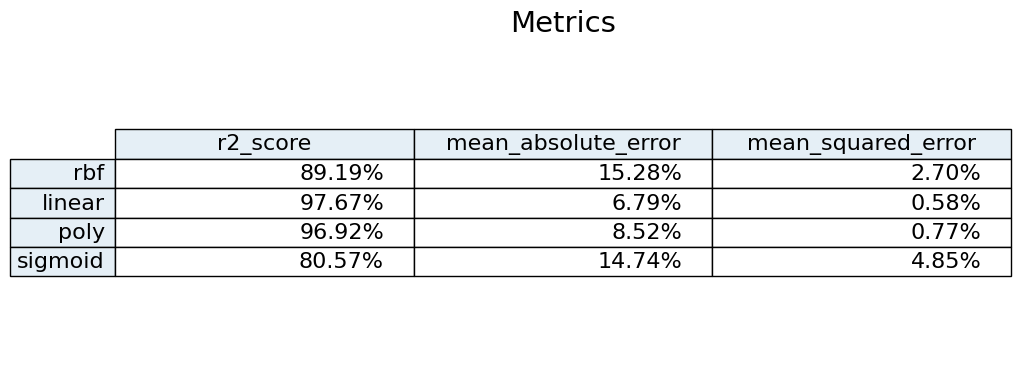

In [37]:
import matplotlib.pyplot as plt

metric = np.array([['{:.2%}'.format(r2_rbf,2),'{:.2%}'.format(mae_rbf),'{:.2%}'.format(mse_rbf)],
                   ['{:.2%}'.format(r2_lin),'{:.2%}'.format(mae_lin),'{:.2%}'.format(mse_lin)],
                   ['{:.2%}'.format(r2_poly),'{:.2%}'.format(mae_poly),'{:.2%}'.format(mse_poly)],
                   ['{:.2%}'.format(r2_sig),'{:.2%}'.format(mae_sig),'{:.2%}'.format(mse_sig)]])

columns = ('r2_score','mean_absolute_error','mean_squared_error')
rows = ('rbf', 'linear', 'poly','sigmoid')
rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
ccolors = plt.cm.BuPu(np.full(len(columns), 0.1))
table = plt.table(cellText=metric,rowLabels=rows,rowColours=rcolors,rowLoc='right',colColours=ccolors,colLabels=columns,loc='center')
table.set_fontsize(31)
table.scale(2, 2)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Metrics', fontsize=21)
plt.show()